In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Create synthetic stock price data with a hidden trend
np.random.seed(42)
n = 200
true_trend = np.linspace(50, 80, n)
noise = np.random.normal(0, 2, n)
prices = true_trend + noise

# Particle Filter Setup
num_particles = 1000
particles = np.random.normal(50, 5, num_particles)
weights = np.ones(num_particles) / num_particles

estimated_trend = []

for t in range(n):

    # Predict step
    particles += np.random.normal(0, 0.5, num_particles)

    # Update step: compare particles with actual price
    distance = np.abs(particles - prices[t])
    weights = np.exp(-distance)
    weights += 1e-12
    weights /= np.sum(weights)

    # Estimate current hidden state
    estimate = np.sum(particles * weights)
    estimated_trend.append(estimate)

    # Resample based on performance
    indices = np.random.choice(
        range(num_particles),
        size=num_particles,
        p=weights
    )
    particles = particles[indices]
    weights = np.ones(num_particles) / num_particles




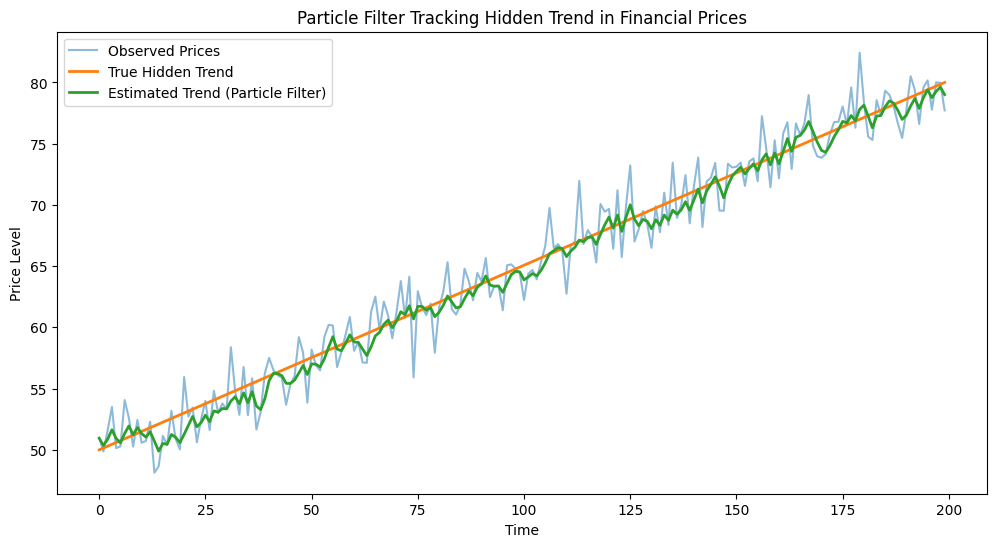

In [2]:
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(prices, label="Observed Prices", alpha=0.5)
plt.plot(true_trend, label="True Hidden Trend", linewidth=2)
plt.plot(estimated_trend, label="Estimated Trend (Particle Filter)", linewidth=2)
plt.legend()
plt.title("Particle Filter Tracking Hidden Trend in Financial Prices")
plt.xlabel("Time")
plt.ylabel("Price Level")
plt.show()